# Deep Learning Project : CAT vs DOG classification

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
import tensorflow as tf
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential #importing our deep learing libraries
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 0. Set directory

In [3]:
CATEGORIES=["cats","dogs"]

In [7]:
test_dir=r"C:\Users\Gatsu\Desktop\Python\Deep Learning\Image classification\CatDog\test_set" #getting our testing data
train_dir=r"C:\Users\Gatsu\Desktop\Python\Deep Learning\Image classification\CatDog\training_set" #getting our training data
val_dir=r"C:\Users\Gatsu\Desktop\Python\Deep Learning\Image classification\CatDog\val_set" #getting our validation data

In [8]:
train_dir_cats = train_dir + '/cats' #storing the cats training images
train_dir_dogs = train_dir + '/dogs' #storing the dogs training images
test_dir_cats = test_dir + '/cats' #storing the cats testing images
test_dir_dogs = test_dir + '/dogs' #storing the dogs testing images
val_dir_cats = val_dir + '/cats' 
val_dir_dogs = val_dir + '/dogs'

### Number of images in each directory

In [9]:
print('number of cats training images - ',len(os.listdir(train_dir_cats))) #printing the number of cat training images
print('number of dogs training images - ',len(os.listdir(train_dir_dogs))) #printing the number of dog training images

print('number of cats validation images - ',len(os.listdir(val_dir_cats))) #printing the number of cat val immages
print('number of dogs validation images - ',len(os.listdir(val_dir_dogs))) #printing the number of dog val images

print('number of cats testing images - ',len(os.listdir(test_dir_cats))) #printing the number of cat testing immages
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs))) #printing the number of dog testing images


number of cats training images -  4000
number of dogs training images -  4000
number of cats validation images -  800
number of dogs validation images -  800
number of cats testing images -  200
number of dogs testing images -  200


# 1. Afficher images avant traitement

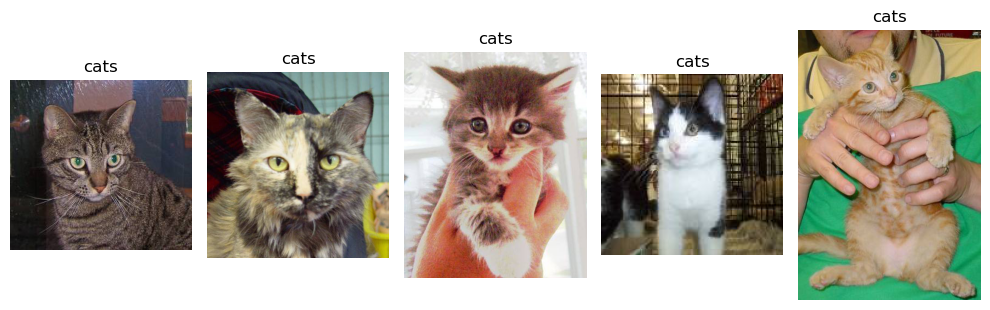

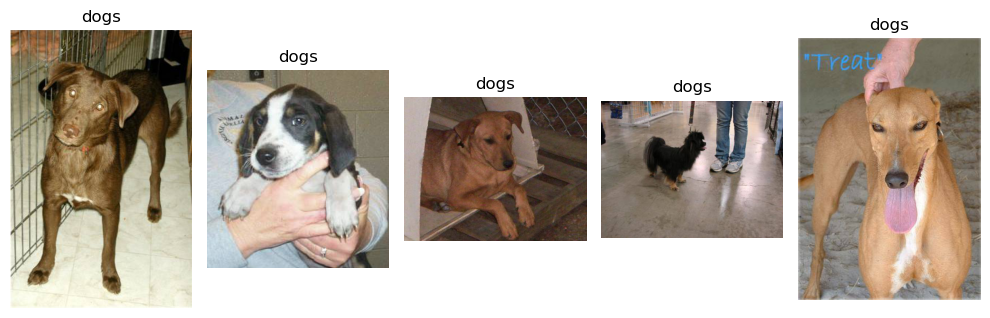

In [10]:
for category in CATEGORIES:
    path = os.path.join(train_dir, category)
    plt.figure(figsize=(10, 5))
    img_count = 0
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, img_count + 1)
        plt.imshow(img_rgb)
        plt.title(category)
        plt.axis('off')
        img_count += 1
        
        if img_count == 5:
            break
    
    plt.tight_layout()
    plt.show()

# 2. PREPROCESSING
### 2.0 Create validation data by spliting test data

Si pas de val/test data : créer !

In [12]:
''' from sklearn.model_selection import train_test_split

# Define paths
test_dir_cats = test_dir + '/cats'
test_dir_dogs = test_dir + '/dogs'

# Get the file lists for cats and dogs in test directories
cats_files = os.listdir(test_dir_cats)
dogs_files = os.listdir(test_dir_dogs)

# Split test data into validation and test sets (e.g., 80% validation, 20% test)
cats_val, cats_test = train_test_split(cats_files, test_size=0.2, random_state=42)
dogs_val, dogs_test = train_test_split(dogs_files, test_size=0.2, random_state=42)

# Create directories for validation and test data
val_dir_cats = test_dir + '/validation/cats'
val_dir_dogs = test_dir + '/validation/dogs'
test_dir_cats_new = test_dir + '/new_test/cats'
test_dir_dogs_new = test_dir + '/new_test/dogs'

os.makedirs(val_dir_cats, exist_ok=True)
os.makedirs(val_dir_dogs, exist_ok=True)
os.makedirs(test_dir_cats_new, exist_ok=True)
os.makedirs(test_dir_dogs_new, exist_ok=True)

# Move validation data to new directories
for file in cats_val:
    os.rename(os.path.join(test_dir_cats, file), os.path.join(val_dir_cats, file))
for file in dogs_val:
    os.rename(os.path.join(test_dir_dogs, file), os.path.join(val_dir_dogs, file))'''

" from sklearn.model_selection import train_test_split\n\n# Define paths\ntest_dir_cats = test_dir + '/cats'\ntest_dir_dogs = test_dir + '/dogs'\n\n# Get the file lists for cats and dogs in test directories\ncats_files = os.listdir(test_dir_cats)\ndogs_files = os.listdir(test_dir_dogs)\n\n# Split test data into validation and test sets (e.g., 80% validation, 20% test)\ncats_val, cats_test = train_test_split(cats_files, test_size=0.2, random_state=42)\ndogs_val, dogs_test = train_test_split(dogs_files, test_size=0.2, random_state=42)\n\n# Create directories for validation and test data\nval_dir_cats = test_dir + '/validation/cats'\nval_dir_dogs = test_dir + '/validation/dogs'\ntest_dir_cats_new = test_dir + '/new_test/cats'\ntest_dir_dogs_new = test_dir + '/new_test/dogs'\n\nos.makedirs(val_dir_cats, exist_ok=True)\nos.makedirs(val_dir_dogs, exist_ok=True)\nos.makedirs(test_dir_cats_new, exist_ok=True)\nos.makedirs(test_dir_dogs_new, exist_ok=True)\n\n# Move validation data to new direc

In [13]:
''' # Move test data to another new directory (optional)
for file in cats_test:
    os.rename(os.path.join(test_dir_cats, file), os.path.join(test_dir_cats_new, file))
for file in dogs_test:
    os.rename(os.path.join(test_dir_dogs, file), os.path.join(test_dir_dogs_new, file))'''

' # Move test data to another new directory (optional)\nfor file in cats_test:\n    os.rename(os.path.join(test_dir_cats, file), os.path.join(test_dir_cats_new, file))\nfor file in dogs_test:\n    os.rename(os.path.join(test_dir_dogs, file), os.path.join(test_dir_dogs_new, file))'

### 2.1 Import libraries

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE=256

### 2.2 Creating ImageDataGenerators:

In [12]:
# Define ImageDataGenerator for train set with minimal preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to [0, 1]
    # You can add more preprocessing options if needed, but minimal augmentation is recommended for transfer learning
)

# Define ImageDataGenerator for validation and test sets without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)  # Rescale validation images
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale test images

#### train_datagen is an instance of ImageDataGenerator created for the training data.

- **rescale=1./255** rescales pixel values to the range [0, 1].
- **shear_range**, **zoom_range**, and **horizontal_flip** are augmentation techniques. shear_range performs random shearing, zoom_range applies random zoom, and horizontal_flip flips images horizontally.

##### We perform (only) a rescaling for validation and test data
- During validation and testing, you're evaluating your model's performance on unseen data, and applying extensive data augmentation isn't necessary or advisable. 
- By only rescaling the pixel values (rescale=1./255), you maintain a similar data format as the training set but without introducing randomness or changes that could affect the model's assessment.

### 2.3 Flowing Data from Directories:

In [13]:
batch_size=64

In [14]:
# Flow training images in batches using ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to 
    batch_size=batch_size,
    class_mode='binary',  # Assuming binary classification (cats vs dogs)
    shuffle=True,
)

Found 8000 images belonging to 2 classes.


In [15]:
# Flow validation images in batches using ImageDataGenerator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode='binary',
)

Found 1600 images belonging to 2 classes.


In [16]:
# Flow validation images in batches using ImageDataGenerator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode='binary',
)

Found 400 images belonging to 2 classes.


#### train_generator** is created by using train_datagen.flow_from_directory().

- **flow_from_directory** generates batches of augmented/processed data from the specified train_dir.
- **target_size** specifies the size of the images after resizing.
- **batch_size** determines the size of each batch.
- **class_mode** is set to 'binary' assuming it's a binary classification problem (cats vs. dogs).
- **color_mode='grayscale'** converts images to grayscale.

## 2.1 Affiché quelques exemples données pré traité

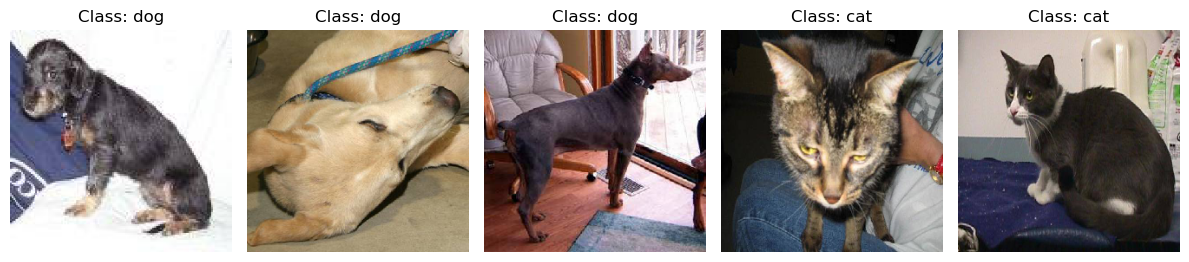

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve a batch of images and labels from the training_data
batch_of_images, batch_of_labels = train_generator.next()

# Display five images along with their labels
plt.figure(figsize=(12, 6))
for i in range(5):  # Displaying only 5 images
    plt.subplot(1, 5, i + 1)  # Adjust subplot parameters for five images
    
    # Ensure correct display for grayscale images
    plt.imshow(np.squeeze(batch_of_images[i]), cmap='gray')
    
    label = batch_of_labels[i]
    if label == 0:
        plt.title('Class: cat')  # Assuming 0 represents the 'cat' class
    else:
        plt.title('Class: dog')  # Assuming 1 represents the 'dog' class
    plt.axis("off")

plt.tight_layout()
plt.show()

In [19]:
train_generator.next()[0].shape

(64, 256, 256, 3)

#### Acces the first image of the first batch

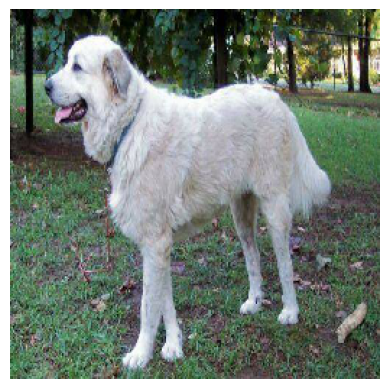

In [20]:
first_batch_of_images, _ = train_generator.next()  # Retrieve the first batch
first_image = first_batch_of_images[0]  # Access the first image in the batch

# Now you can work with the 'first_image', such as displaying it using Matplotlib
import matplotlib.pyplot as plt

plt.imshow(first_image.squeeze(), cmap='gray')  # Display the first image
plt.axis('off')  # Hide axis labels and ticks
plt.show()

#### In a array 

In [21]:
first_image

array([[[0.34117648, 0.33333334, 0.24313727],
        [0.01176471, 0.00392157, 0.        ],
        [0.08627451, 0.07843138, 0.09019608],
        ...,
        [0.41176474, 0.43921572, 0.26666668],
        [0.58431375, 0.6117647 , 0.20392159],
        [0.6666667 , 0.69411767, 0.28627452]],

       [[0.49803925, 0.49803925, 0.4039216 ],
        [0.09411766, 0.08627451, 0.03921569],
        [0.06666667, 0.05882353, 0.07058824],
        ...,
        [0.6039216 , 0.63529414, 0.43529415],
        [0.63529414, 0.6784314 , 0.2784314 ],
        [0.74509805, 0.78823537, 0.38823533]],

       [[0.43529415, 0.43529415, 0.34117648],
        [0.2392157 , 0.2392157 , 0.19215688],
        [0.21960786, 0.21176472, 0.22352943],
        ...,
        [0.6392157 , 0.67058825, 0.37647063],
        [0.64705884, 0.7372549 , 0.38431376],
        [0.6431373 , 0.73333335, 0.3803922 ]],

       ...,

       [[0.3921569 , 0.5764706 , 0.39607847],
        [0.3647059 , 0.54509807, 0.36078432],
        [0.36862746, 0

In [22]:
# Get the first batch of images and labels
batch_of_images, batch_of_labels = train_generator.next()

# Print the arrays of images and labels
print("Images:")
print(batch_of_images)
print("\nLabels:")
print(batch_of_labels)

Images:
[[[[0.6431373  0.73333335 0.69411767]
   [0.63529414 0.7254902  0.6862745 ]
   [0.6039216  0.69411767 0.654902  ]
   ...
   [0.4431373  0.53333336 0.50980395]
   [0.44705886 0.5372549  0.5137255 ]
   [0.44705886 0.5372549  0.5137255 ]]

  [[0.6509804  0.7411765  0.7019608 ]
   [0.64705884 0.7372549  0.69803923]
   [0.6156863  0.7058824  0.6666667 ]
   ...
   [0.454902   0.54509807 0.52156866]
   [0.454902   0.54509807 0.52156866]
   [0.454902   0.54509807 0.52156866]]

  [[0.654902   0.74509805 0.7058824 ]
   [0.654902   0.74509805 0.7058824 ]
   [0.62352943 0.7137255  0.6745098 ]
   ...
   [0.46274513 0.5529412  0.5294118 ]
   [0.46274513 0.5529412  0.5294118 ]
   [0.46274513 0.5529412  0.5294118 ]]

  ...

  [[0.16470589 0.16470589 0.1254902 ]
   [0.16862746 0.16862746 0.12941177]
   [0.1764706  0.1764706  0.13725491]
   ...
   [0.45882356 0.4784314  0.5921569 ]
   [0.45098042 0.47450984 0.5686275 ]
   [0.45098042 0.47450984 0.5686275 ]]

  [[0.16078432 0.16078432 0.12156864]

### Vérification du scaling

In [23]:
data_iterator = iter(train_generator)  # Get an iterator from train_dataset
batch = next(train_generator)  # Retrieve the first batch from the iterator
print("Minimum pixel value in the first batch's images:", batch[0].min())
print("Maximum pixel value in the first batch's images:", batch[0].max())

Minimum pixel value in the first batch's images: 0.0
Maximum pixel value in the first batch's images: 1.0


- **iter(train_generator):** This line creates an iterator from train_generator.
- **next(train_generator):** This retrieves the first batch from the iterator. Here, batch[0] contains the images.
- **batch[0].min():** This checks the minimum pixel value in the images of the first batch.
- **batch[0].max():** This checks the maximum pixel value in the images of the first batch.

### If i want the first image of the third batchs 

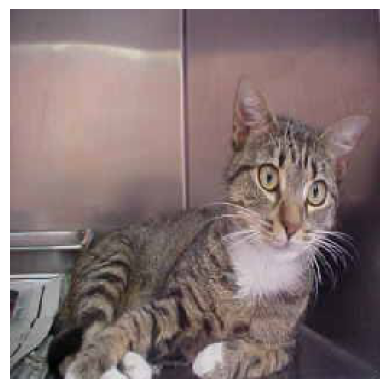

In [24]:
data_iterator = iter(train_generator)  # Create an iterator from train_generator

# Skip the first two batches (0-indexed) to get to the third batch
for _ in range(2):
    next(data_iterator)

# Retrieve the third batch
third_batch = next(data_iterator)

# Access the first image from the third batch
first_image_of_third_batch = third_batch[0][0]  # Accessing the first image in the third batch

# Display or work with the first image of the third batch as needed
plt.imshow(first_image_of_third_batch.squeeze(), cmap='gray')  # Display the first image
plt.axis('off')  # Hide axis labels and ticks
plt.show()

# 3. PRE TRAINED MODELE
### 3.1 Deep Learning Model

In [25]:
#size train
train_generator.image_shape

(256, 256, 3)

In [27]:
#size val
val_generator.image_shape

(256, 256, 3)

In [28]:
#size test
test_generator.image_shape

(256, 256, 3)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [32]:
# Load the pre-trained VGG16 model (without the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

58889256/58889256 [==============================] - 2s 0us/step


Absolument ! Lorsque nous utilisons include_top=False lors du chargement d'un modèle pré-entraîné comme VGG16, cela signifie que nous excluons les couches de classification situées au sommet du modèle.

Le réseau VGG16 original a été conçu pour la classification d'images sur 1000 classes différentes telles que chiens, chats, voitures, avions, etc., provenant du jeu de données ImageNet. Les couches de classification au sommet du modèle VGG16 sont les couches denses finales qui prennent les caractéristiques extraites par les couches convolutives et les utilisent pour classifier l'image en l'une des 1000 catégories.

En spécifiant include_top=False, nous omettons ces couches de classification finales. Cela signifie que le modèle chargé se termine juste avant ces couches de classification. Ainsi, nous obtenons un modèle qui se compose uniquement des couches convolutionnelles (convolution, pooling, etc.) sans les couches finales de classification.

En faisant cela, nous pouvons utiliser ces couches convolutionnelles pour extraire des caractéristiques des images, et ensuite ajouter nos propres couches personnalisées (comme des couches denses supplémentaires) pour adapter le modèle à notre tâche spécifique, comme la classification binaire des images de chats et de chiens. Cela nous permet d'utiliser les caractéristiques apprises par les couches convolutives sur des données ImageNet pour résoudre notre problème spécifique sans avoir à ré-entraîner l'ensemble du réseau.

In [33]:
# Freeze the pre-trained layers
base_model.trainable = False

In [34]:
# Create a new model by adding new classification layers on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

Lorsque nous utilisons un modèle pré-entraîné comme VGG16 (ou tout autre modèle similaire), les couches convolutionnelles extraites ont appris à détecter des caractéristiques utiles et abstraites dans les images. Cependant, ces caractéristiques pourraient être génériques et n'incluraient peut-être pas des informations spécifiques à notre tâche de classification binaire (chats vs. chiens).

Ainsi, en ajoutant une couche Dense supplémentaire avec un nombre de neurones plus élevé, tel que Dense(128, activation='relu'), on donne à notre modèle la possibilité d'apprendre des représentations plus complexes et plus spécifiques basées sur les caractéristiques extraites par les couches convolutionnelles. Cette couche intermédiaire permet d'introduire plus de flexibilité pour la représentation des données.

Ensuite, la couche de sortie Dense(1, activation='sigmoid') est utilisée pour obtenir la prédiction finale. Cette couche utilise une fonction d'activation sigmoid, adaptée à la classification binaire, pour produire une prédiction entre 0 et 1, indiquant la probabilité que l'image appartienne à la classe positive (chien, dans ce cas) par opposition à la classe négative (chat).

In [36]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
# Train the model using the prepared data generators
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/10
125/125 [==============================] - 717s 6s/step - loss: 0.3125 - accuracy: 0.8594 - val_loss: 0.2074 - val_accuracy: 0.9212
Epoch 2/10
125/125 [==============================] - 728s 6s/step - loss: 0.1633 - accuracy: 0.9356 - val_loss: 0.1839 - val_accuracy: 0.9300
Epoch 3/10
125/125 [==============================] - 716s 6s/step - loss: 0.1139 - accuracy: 0.9599 - val_loss: 0.1759 - val_accuracy: 0.9300
Epoch 4/10
125/125 [==============================] - 712s 6s/step - loss: 0.0902 - accuracy: 0.9732 - val_loss: 0.1751 - val_accuracy: 0.9350
Epoch 5/10
125/125 [==============================] - 726s 6s/step - loss: 0.0699 - accuracy: 0.9812 - val_loss: 0.1919 - val_accuracy: 0.9275
Epoch 6/10
125/125 [==============================] - 737s 6s/step - loss: 0.0564 - accuracy: 0.9887 - val_loss: 0.1654 - val_accuracy: 0.9337
Epoch 7/10
125/125 [==============================] - 737s 6s/step - loss: 0.0475 - accuracy: 0.9902 - val_loss: 0.1765 - val_accuracy: 0.9300

#### Flatten & dense
- **Flatten()** transforms the data to a 1D array for feeding into the dense layers.
- **Dense layer**s are fully connected layers for final classification.

# 4 Plot performance

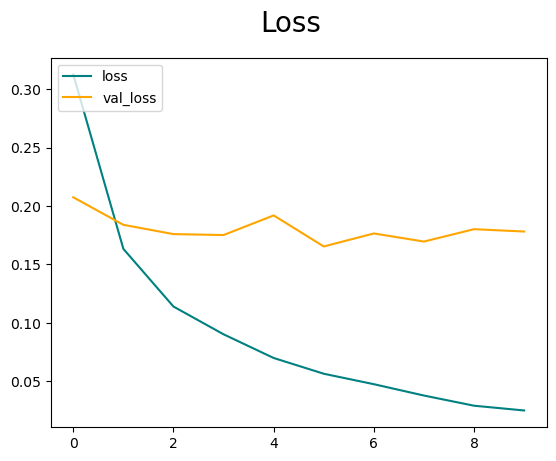

In [39]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

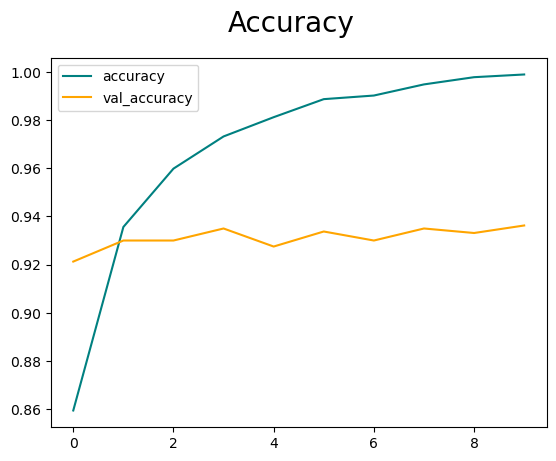

In [40]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 5. Evaluate Model on test set

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

# Reset states of the metrics
pre.reset_states()
re.reset_states()
acc.reset_states()

# Iterate through the test data manually
for i in range(len(test_generator)):
    batch = test_generator[i]
    X, y = batch

    # Predict on the batch
    yhat = model.predict(X)

    # Update the states of the metrics
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

# Compute final results
precision_result = pre.result().numpy()
recall_result = re.result().numpy()
accuracy_result = acc.result().numpy()

print("Precision:", precision_result)
print("Recall:", recall_result)
print("Binary Accuracy:", accuracy_result)

1/1 [==============================] - 1s 1s/step
Precision: 0.9170732
Recall: 0.94
Binary Accuracy: 0.9275


# 6. Test model

In [42]:
from tensorflow.keras.preprocessing import image as keras_image
import numpy as np

def test_model_on_image(model, image_path, img_size=IMG_SIZE):
    img = keras_image.load_img(image_path, target_size=(img_size, img_size))
    img_array = keras_image.img_to_array(img)
    img_array = img_array / 255.0  # Apply the same scaling as done in the dataset preprocessing
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make predictions
    predictions = model.predict(img_array)

    # Return predictions
    return predictions

## 6.1 Test on a cat image

In [51]:
#set treshold
threshold = 0.5
# Usage:
image_path = r'C:\Users\Gatsu\Desktop\Python\Deep Learning\Image classification\neverseen\chat2.jpg'
predictions = test_model_on_image(model, image_path, IMG_SIZE)
# Process predictions as needed
print(predictions)
if predictions[0] > threshold:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 104ms/step
[[0.00265603]]
It's a cat!


## 6.2 Test on a dog image

In [50]:
# Usage:
image_path = r'C:\Users\Gatsu\Desktop\Python\Deep Learning\Image classification\neverseen\dog1.jpg'
predictions = test_model_on_image(model, image_path, IMG_SIZE)
# Process predictions as needed
print(predictions)
if predictions[0] > threshold:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 104ms/step
[[0.9999826]]
It's a dog!


When your model performs well on the training and validation sets but shows reduced performance on random test images, there could be several reasons for this discrepancy:

- **Data Distribution:** The random test images might come from a different distribution than your training and validation sets. They could have different lighting conditions, backgrounds, or compositions, leading to performance differences.

- **Overfitting:** The model might have overfit to specific patterns in the training/validation data that don't generalize well to new, unseen images. To mitigate this, consider augmenting your training data, using regularization techniques, or adjusting model complexity.

- **Domain Shift:** The random test images might represent scenarios or features that the model hasn't encountered in the training/validation data. It might be beneficial to collect more diverse data to cover a broader range of scenarios.

- **Preprocessing Mismatch:** Ensure that the preprocessing applied to the random test images matches that of your training/validation data. Any inconsistency in preprocessing steps could affect model performance.

#### To address this issue:

- **Data Augmentation:** Augment your training data with more diverse transformations to make the model more robust to various scenarios.
- **Regularization:** Apply regularization techniques (dropout, batch normalization) to prevent overfitting.
- **Transfer Learning:** Consider using transfer learning with pre-trained models that have been trained on a more extensive and diverse dataset to leverage their learned features.
Analyzing misclassified random test images can provide insights into where the model struggles. This analysis might guide adjustments in the training data, model architecture, or preprocessing steps to improve performance on unseen data.

# 7. Save model

In [52]:
from tensorflow.keras.models import load_model
model.save('C:/Users/Gatsu/Desktop/Python/Deep Learning/transferlearningmodel.h5')

In [53]:
#Load
loaded_model = load_model('C:/Users/Gatsu/Desktop/Python/Deep Learning/transferlearningmodel.h5')

## 7.1 Test loaded model

In [57]:
from tensorflow.keras.preprocessing import image as keras_image
import numpy as np

def test_model_on_image(model, image_path, img_size=250):
    img = keras_image.load_img(image_path, target_size=(img_size, img_size))
    img_array = keras_image.img_to_array(img)
    img_array = img_array / 255.0  # Apply the same scaling as done in the dataset preprocessing
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = loaded_model.predict(img_array)

    # Return predictions
    return predictions
    pass

# Usage:
image_path = r'C:\Users\Gatsu\Desktop\Python\Deep Learning\Image classification\neverseen\chat2.jpg'
predictions = test_model_on_image(model, image_path, IMG_SIZE)
# Process predictions as needed
print(predictions)
if predictions[0] > threshold:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 104ms/step
[[0.00265603]]
It's a cat!


# 8. Web scrap Dog & Cat images

## 8.1 Function to download images
- Define a function, to download 3 dog & cats images from the site "unsplash" with the API integrated
- Create a folder named "downloaded_images" and create "cat" and "dog" folder in it

In [62]:
import requests
import os
import shutil

def download_images_from_unsplash(query, count):
    access_key = "Ej9u83TWzawv_KGHvp5sCVPdCiaz-dww5nHDiccNshk"  # Replace with your access key
    url = f"https://api.unsplash.com/photos/random/?query={query}&count={count}"
    headers = {"Authorization": f"Client-ID {access_key}"}
    download_path = f"downloaded_images/{query}"

    try:
        # Remove the directory if it already exists
        if os.path.exists(download_path):
            shutil.rmtree(download_path)

        os.makedirs(download_path)

        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an error for HTTP status codes that indicate a problem
        data = response.json()

        for i, image in enumerate(data):
            img_url = image['urls']['regular']
            img_data = requests.get(img_url).content
            with open(f"{download_path}/{query}_{i + 1}.jpg", 'wb') as handler:
                handler.write(img_data)

        print(f"{count} images of {query} downloaded successfully!")

    except requests.exceptions.RequestException as e:
        print(f"Failed to download {count} images of {query}. Error: {e}")

# Example: download 10 random images of cats and dogs, replacing existing images if any
download_images_from_unsplash("cat", 10)  # Downloads 10 random cat images
download_images_from_unsplash("dog", 10)  # Downloads 10 random dog images

10 images of cat downloaded successfully!
10 images of dog downloaded successfully!


## 8.2 Testing my model on the new random images
- Create a function adapted so it read my 3 images of cat and dog, and compute the predicted probabilities

In [63]:
from tensorflow.keras.preprocessing import image as keras_image
import numpy as np
import os

def test_model_on_download_images(model, folder_path):
    images = [file for file in os.listdir(folder_path) if not file.startswith(".")]
    predictions = []

    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = keras_image.load_img(img_path, target_size=(256, 256))
        img_array = keras_image.img_to_array(img)
        img_array = img_array / 255.0  # Apply the same scaling as done in the dataset preprocessing
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make predictions
        result = model.predict(img_array)
        predictions.append((img_name, result[0][0]))  # Assuming binary classification, taking the prediction for class 1

    return predictions

#### We apply our function and put the predicted probabilities and the image name on a list
- cat_predictions (image_name, predicted probabilities)
- dog_predictions

#### We pass through cat & dog prediction list and see if our model guessed correct. 
- A probability 0 < p < **treshold** means it predicted "cat"
- A probability **treshold** < p < 1 means it predicted "dog"

In [64]:
# Example usage:
# Replace "model" with your trained model and provide the folder path accordingly
cat_predictions = test_model_on_download_images(model, "downloaded_images/cat")
dog_predictions = test_model_on_download_images(model, "downloaded_images/dog")

# Print predictions for cats
print("Predictions for cats:")
for img_name, result in cat_predictions:
    print(f"{img_name}: {result}")
    if result < threshold:
        print("RIGHT GUESS")
    else:
        print("WRONG GUESS")

# Print predictions for dogs
print("\nPredictions for dogs:")
for img_name, result in dog_predictions:
    print(f"{img_name}: {result}")
    if result > threshold:
        print("RIGHT GUESS")
    else:
        print("WRONG GUESS")

1/1 [==============================] - 0s 104ms/step
Predictions for cats:
cat_1.jpg: 0.0005064881406724453
RIGHT GUESS
cat_10.jpg: 2.3080192477209494e-05
RIGHT GUESS
cat_2.jpg: 0.9659143686294556
WRONG GUESS
cat_3.jpg: 0.003071120008826256
RIGHT GUESS
cat_4.jpg: 0.0002563376328907907
RIGHT GUESS
cat_5.jpg: 0.0006214565364643931
RIGHT GUESS
cat_6.jpg: 0.47374826669692993
RIGHT GUESS
cat_7.jpg: 6.576225132448599e-06
RIGHT GUESS
cat_8.jpg: 8.398057980230078e-05
RIGHT GUESS
cat_9.jpg: 0.006592550780624151
RIGHT GUESS

Predictions for dogs:
dog_1.jpg: 0.9999949932098389
RIGHT GUESS
dog_10.jpg: 0.9998716115951538
RIGHT GUESS
dog_2.jpg: 0.9999810457229614
RIGHT GUESS
dog_3.jpg: 0.9999627470970154
RIGHT GUESS
dog_4.jpg: 0.6060117483139038
RIGHT GUESS
dog_5.jpg: 0.952911376953125
RIGHT GUESS
dog_6.jpg: 0.995811939239502
RIGHT GUESS
dog_7.jpg: 0.9999873042106628
RIGHT GUESS
dog_8.jpg: 0.9991695284843445
RIGHT GUESS
dog_9.jpg: 0.990446150302887
RIGHT GUESS
